In [1]:
import warnings; warnings.filterwarnings("ignore")

import sys
sys.path.append('..')
# from id_signaling.figures import load_minority_dfs, covert_vs_minority_frac, minority_diff_heatmap

from id_signaling.figures import minority_diff_heatmap, similarity_threshold

# Covert signaling in minority populations

Here we examine how covert signaling evolves under different minority/majority population scenarios. We have data for two different minority prevalences, $\rho^{minor}=0.1,0.2$. We also vary the similarity measure. 

To analyze this data I will make heatmaps for a variety of parameter combinations, and also plot the dependence of $\rho_{cov}^{minor/major}$ against the tolerance parameter. 

This will take some hacking of existing figure making functions, but should be doable with what currently exists.

The major issue is to pre-process the directory of minority-tolerance data to know which files files contain data run under different parameter settings. This is rather ugly, but a necessary consequence of not using a better file format like HDF for the outputs.

I will select out only the data for parameter settings I plan to use. We use $K=3,9$ and set the number of traits used to delineate minority and majority populations to be $M=K - \frac{K+1}{2}$, which will be 1 and 4 for the two $K$ values. We tested two values of minority prevalence in the population, $\rho^{minor}=0.1,0.2$. Finally, for each combination of $K$ and $\rho^{minor}$ we tested three similarity threshold values, $S=0.3,0.5,0.9$. These correspond to greater than 1/3, "1/2", and "all" traits required to be identical in order to consider two agents to be similar.     

We use odd number $K$ with the chosen values of $M$ so that it takes only one trait in common for ingroup (both minority or majority) dyads to be similar, always with the same probability $\frac{1}{2}$, but $\frac{K+1}{2}$ traits in common for outgroup dyads to be similar. The probability an outgroup dyad is similar, then, would be $2^{-(\frac{K+1}{2})}$: $\frac{1}{4}$ for $K=3$ and $\frac{1}{32}$ for $K=9$.

In [2]:
import csv
import re

from glob import glob

# First collect all part files containing experimental trials.
gs = glob('../data/minority/*/*.csv')

# Initialize a list to hold all collected blobs.
blobs = []
for g in gs:
    data = csv.reader(open(g, 'r'))
    header = next(data)
    first = next(data)
    blob = dict(list(zip(header, first))[:3])
    blob.update({'file': g})
    blob.update(dict(minority_frac = re.search(string=g, pattern='\d\.\d\d').group()))
    blobs.append(blob)
    
# Load dataframes for parameter combinations of interest.
# Parameters are strings because that's how they were read
# in the previous step.
Ks = ['3', '9']
minority_fracs = ['0.10', '0.20']

# I oversampled for K=3 and had S=0.5 fail for both minority fracs
# in K=3. For K=3, S=0.5 is equivalent to S=0.6 since both will be 
# surpassed when dyads share 2/3 traits.
Ss = {'3': ['0.3', '0.5', '0.8'],
      '9': ['0.3', '0.5', '0.8']}

# Iterate through all blobs and select out parameters of interest.
blobs_to_load = []
for K in Ks:
    for S in Ss[K]:
        for minority_frac in minority_fracs:
            matching_blobs = [
                b for b in blobs if 
                b['K'] == K and
                b['S'] == S and
                b['minority_frac'] == minority_frac
            ]
            
            df_parts = [pd.read_csv(b['file']) for b in matching_blobs]
            
            blobs_to_load.append({
                'K': K,
                'S': S,
                'minority_frac': minority_frac,
                'df': pd.concat(df_parts)
            })
# XXX this seems problematic. Instead of taking the first one found it seems we now need to 
# track all matching blobs, not just the first. Then create a DF for each one and concatenate
# them all.

# Update blobs of interest with DataFrame version of data.
# for b in blobs_to_load:
#     print(f'loading file for {b}')
#     b.update({'df': pd.read_csv(b['file'])})

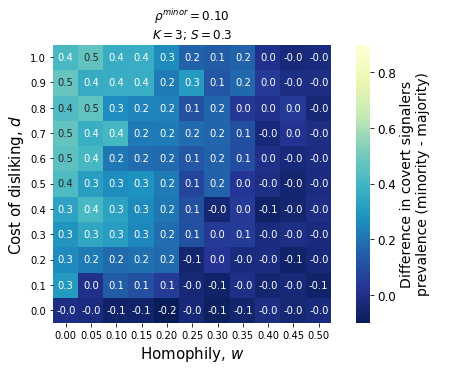

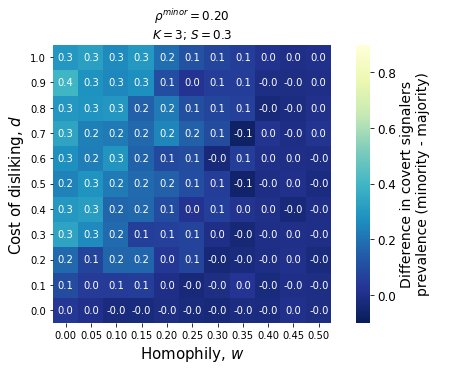

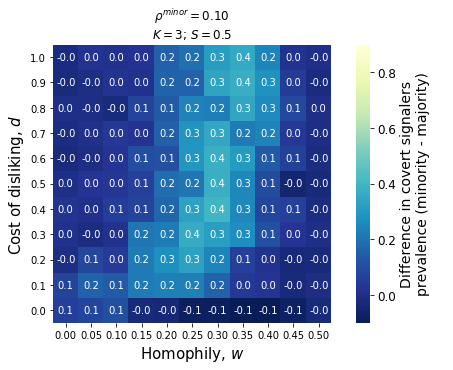

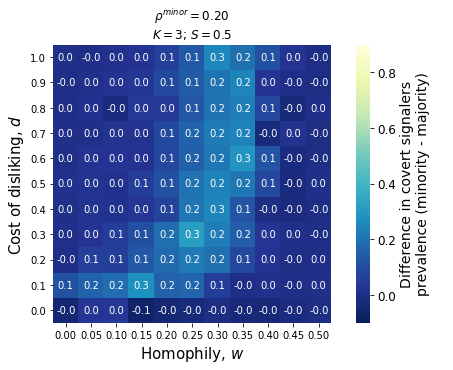

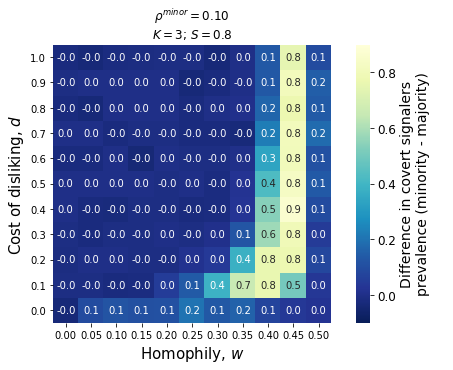

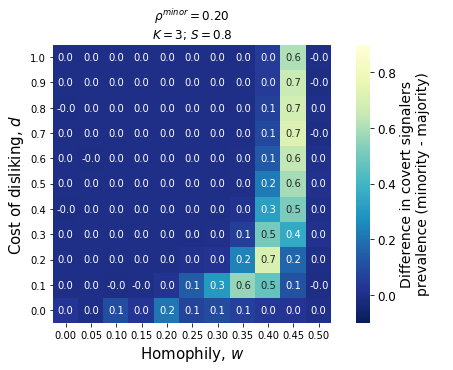

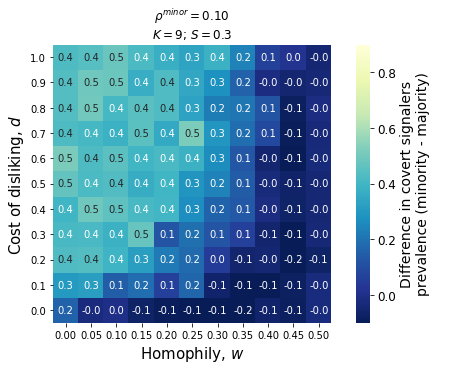

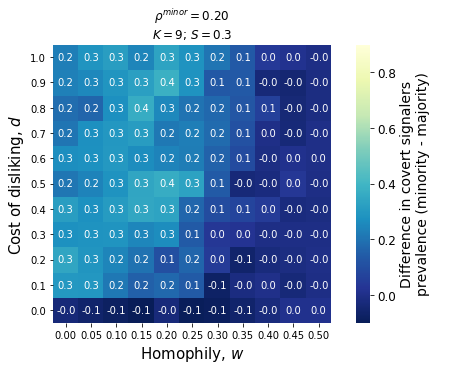

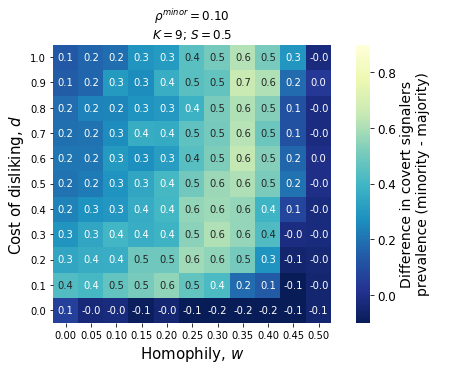

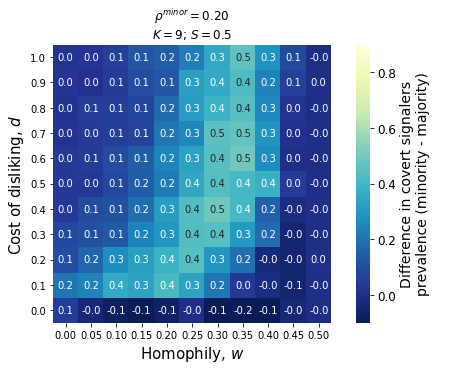

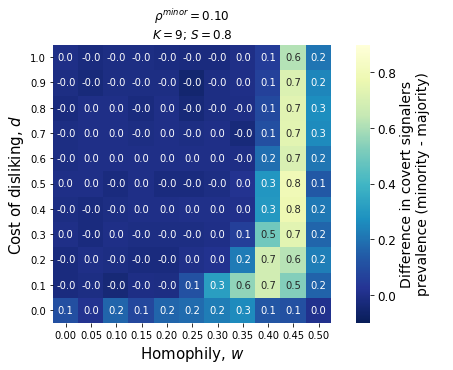

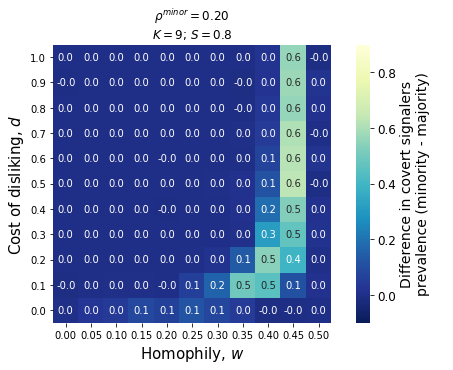

In [23]:
# Go through and make one figure for each where the filename
# indicates the parameters.

FIGDIR = '../../papers/id-sig/Figures'

for b in blobs_to_load:
    df = b['df']
    K = b['K']
    rho_cov = b['minority_frac']
    S = b['S']
    title = f'$\\rho^{{minor}}={b["minority_frac"]}$\n$K={b["K"]}$; $S={b["S"]}$'
    savefig_path = \
    f'{FIGDIR}/minority_tolerance/{K}_{str(rho_cov).replace(".","p")}_{str(S).replace(".","p")}.pdf'
    minority_diff_heatmap(
        df, 
#         annot=False,
        vmin=-0.1,
        vmax=0.9,
        title=title,
        savefig_path=savefig_path,
        cmap='YlGnBu_r'
    )

## Line plots of minority and majority signaling over homophily

line plots of the probability covert signaling evolves for minority and majority agents as function of homophily, for the three values of S (0.3, 0.5, 0.8), keeping the cost of disliking a moderate value like 0.5. That way we will see if the lack of difference is driven by ceiling/floor effects, such as when both types adopts maximal or minimal covert signaling.

To start, I will plot one curve corresponding to one value of S over homphily for $d=0.5$. Set K=3 for this first one. Let's use S=0.5 to start.

In [14]:
# from id_signaling.figures import minority_line_plots

# # Select out one dataframe of interest from blobs built in previous cells.
# df = [b for b in blobs_to_load if 
#       (b['K'] == '3' and b['minority_frac'] == '0.10' and b['S'] == '0.5')
#      ][0]['df']

# print(df.homophily.unique())
# # hmeans = minority_line_plots(df)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


TypeError: string indices must be integers

In [10]:
# # hmeans.index[:11]
# hmeans.head()
# # plt.plot(hmeans.index, hmeans.)
# hmeans.prop_covert_minority.plot(label='Covert signaling in minority', color='black')
# hmeans.prop_covert_majority.plot(label='Covert signaling in majority', color='black', style='--')
# plt.legend(fontsize=14)
# plt.title('K=3, S=0.5, minority size: 10%', size=15)

NameError: name 'hmeans' is not defined

In [15]:
from id_signaling.figures import minority_line_plots

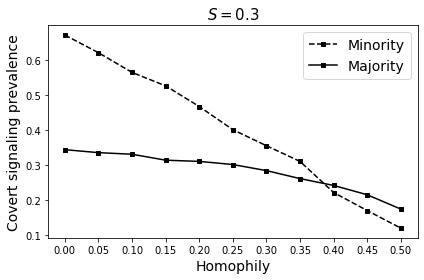

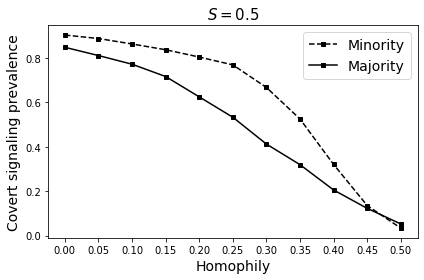

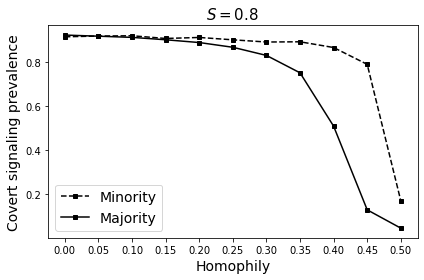

In [16]:
df_blobs = blobs_to_load
minority_line_plots(blobs_to_load)

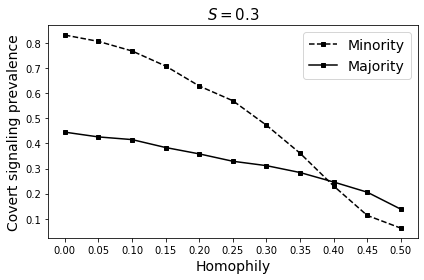

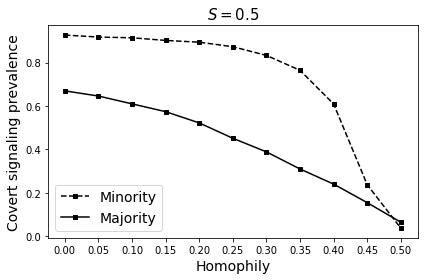

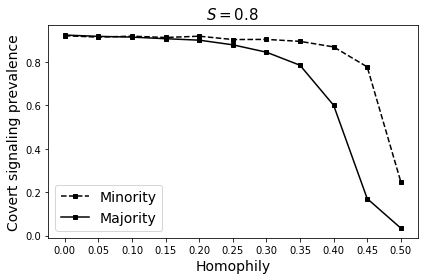

In [17]:
minority_line_plots(df_blobs, K='9', disliking=0.5)